In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Surge_price_prediction/sigma_cabs.csv')

In [ ]:
df

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [ ]:
for i in (df):
    print("-"*5+i+"-"*5,end = " - ")
    display(df[i].value_counts())

In [ ]:
df.isnull().sum()

In [ ]:
df["Type_of_Cab"] = df["Type_of_Cab"].fillna("F")

In [ ]:
df["Type_of_Cab"].value_counts()

In [ ]:
df.corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.116812,0.509482,-0.054654,-0.007686,-0.045468,0.200456,0.231706,0.135928
Customer_Since_Months,0.116812,1.000000,0.135114,-0.050349,-0.006325,-0.009856,0.042637,0.113403,0.027827
Life_Style_Index,0.509482,0.135114,1.000000,0.205824,0.074023,-0.091307,0.234754,0.329312,-0.080108
Customer_Rating,-0.054654,-0.050349,0.205824,1.000000,0.003595,-0.010968,-0.302968,-0.227531,-0.155279
Cancellation_Last_1Month,-0.007686,-0.006325,0.074023,0.003595,1.000000,0.010953,0.095830,0.128686,0.185646
Var1,-0.045468,-0.009856,-0.091307,-0.010968,0.010953,1.000000,-0.046755,-0.061993,-0.040735
Var2,0.200456,0.042637,0.234754,-0.302968,0.095830,-0.046755,1.000000,0.683437,0.003437
Var3,0.231706,0.113403,0.329312,-0.227531,0.128686,-0.061993,0.683437,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.027827,-0.080108,-0.155279,0.185646,-0.040735,0.003437,-0.039309,1.000000


<Axes: xlabel='Trip_Distance', ylabel='Count'>

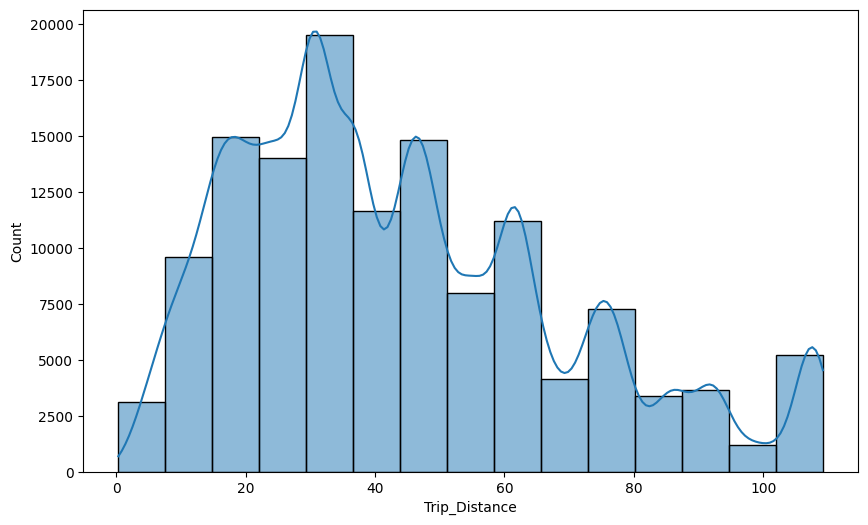

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Trip_Distance'], kde = True, bins = 15)

<Axes: xlabel='Customer_Rating', ylabel='Count'>

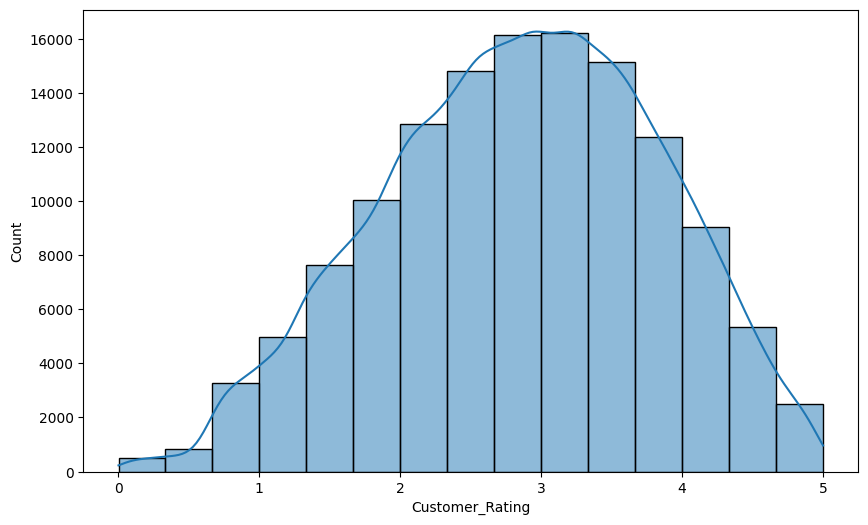

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Customer_Rating'], kde = True, bins = 15)

<Axes: xlabel='Type_of_Cab', ylabel='count'>

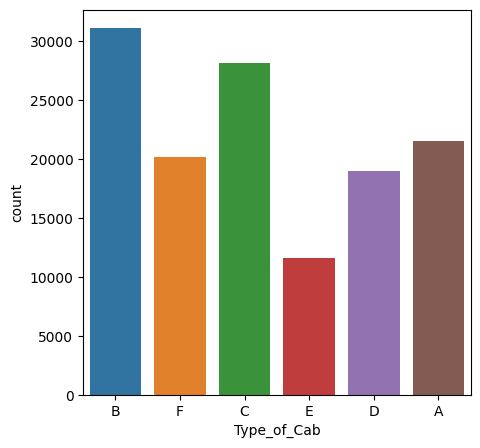

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Type_of_Cab',data=df)

In [ ]:
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [ ]:
df = df.dropna(subset=["Life_Style_Index"])

In [ ]:
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months           5063
Life_Style_Index                   0
Confidence_Life_Style_Index        0
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           60099
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [ ]:
df['Customer_Since_Months'].fillna(int(df['Customer_Since_Months'].mean()), inplace=True)
df['Var1'].fillna(int(df['Var1'].mean()), inplace=True)

In [ ]:
df.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [ ]:
cats = [c for c in df.columns if df[c].dtypes == 'object']
nums = [c for c in df.columns if c not in cats]

In [ ]:
cats

['Trip_ID',
 'Type_of_Cab',
 'Confidence_Life_Style_Index',
 'Destination_Type',
 'Gender']

In [ ]:
nums

['Trip_Distance',
 'Customer_Since_Months',
 'Life_Style_Index',
 'Customer_Rating',
 'Cancellation_Last_1Month',
 'Var1',
 'Var2',
 'Var3',
 'Surge_Pricing_Type']

<Axes: >

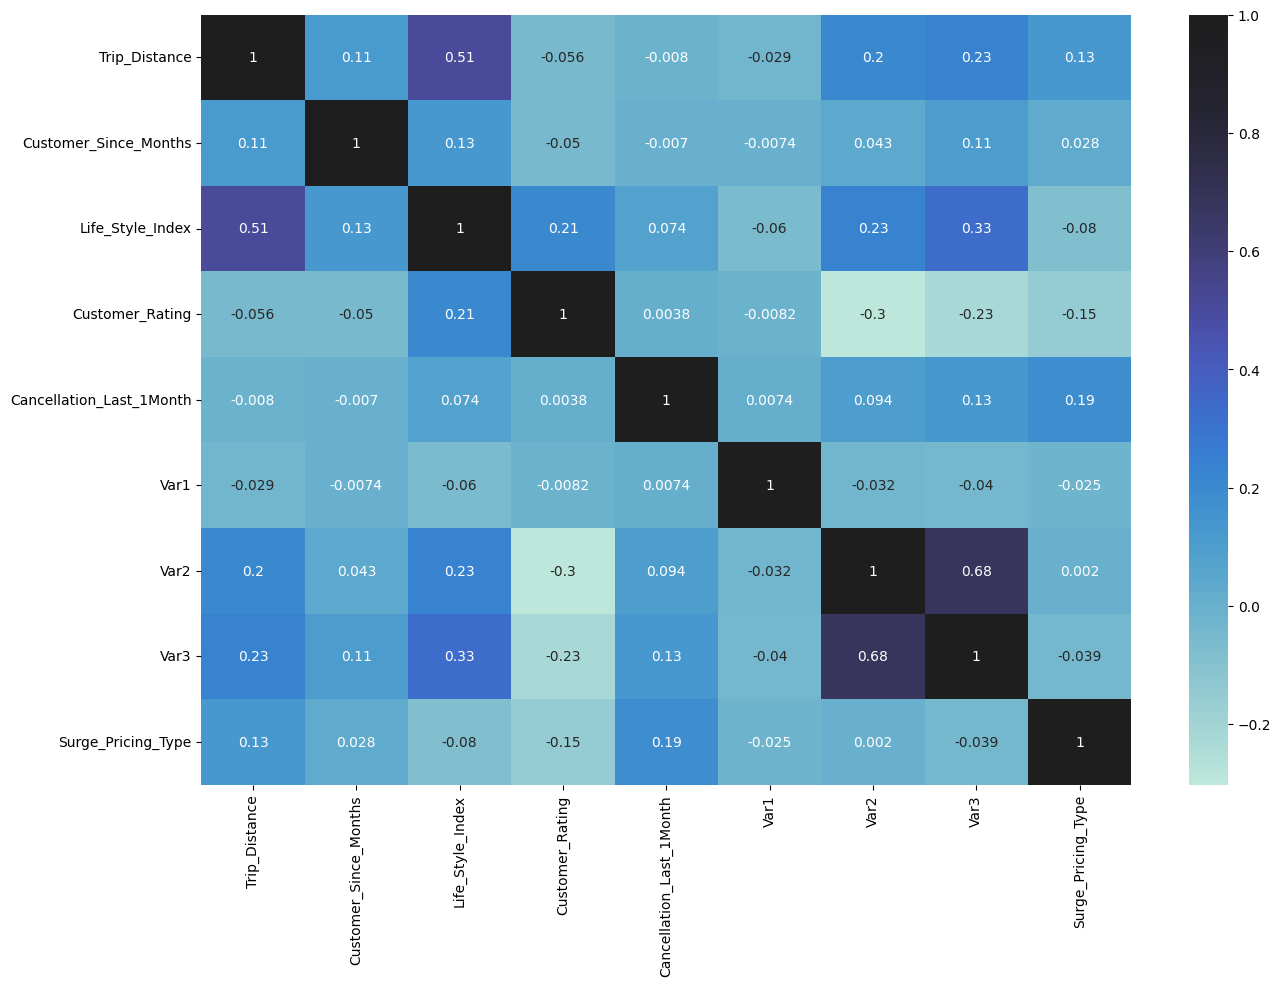

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, center=True)

<Axes: xlabel='Trip_Distance', ylabel='Type_of_Cab'>

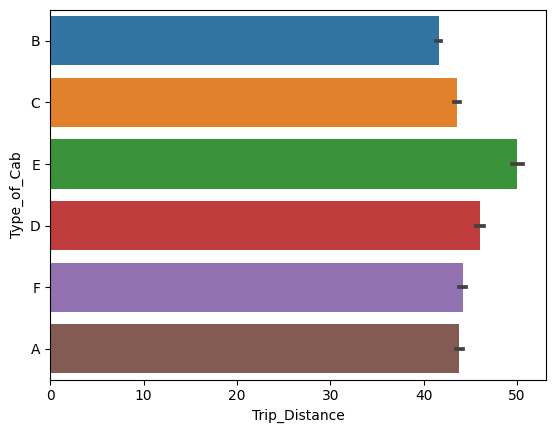

In [ ]:
sns.barplot(data=df, x="Trip_Distance",y='Type_of_Cab')

All the cabs are equally booked for any kind of trip distance.
Type E cabs are booked slightly more than other type of cabs for long distances.

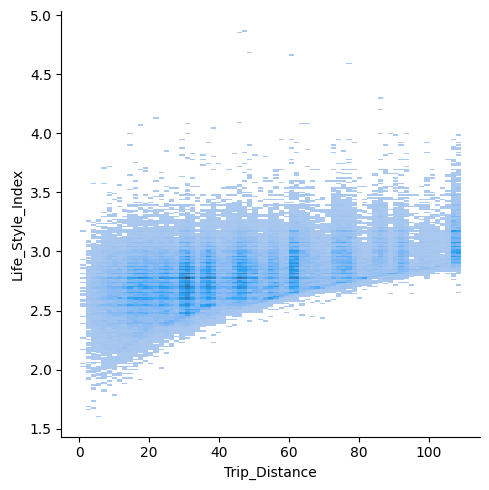

In [ ]:
sns.displot(data=df, x="Trip_Distance", y="Life_Style_Index")

The life style index is almost consistent when compared to the distance of the trip.

It can also be observed that the life style index is less for less distance trips.While it is not seen to be more for long distance trips but it is being consistent.

<Axes: xlabel='Customer_Since_Months', ylabel='Count'>

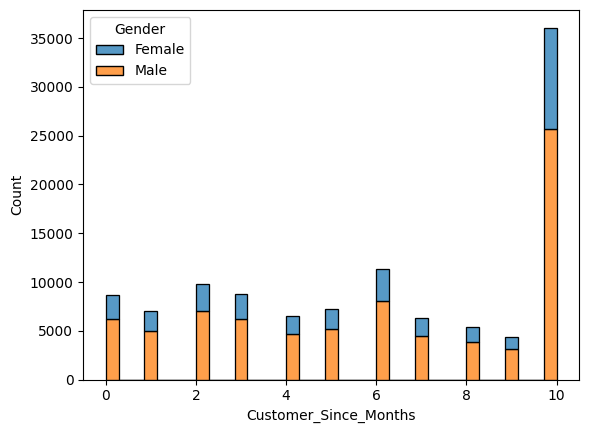

In [ ]:
sns.histplot(data=df, x="Customer_Since_Months", hue="Gender", multiple="stack")

The count of male customers are observed to be more in number.

It can also be seen that male customers have the tendency to remain customer for months when compared to female.

<Axes: ylabel='Density'>

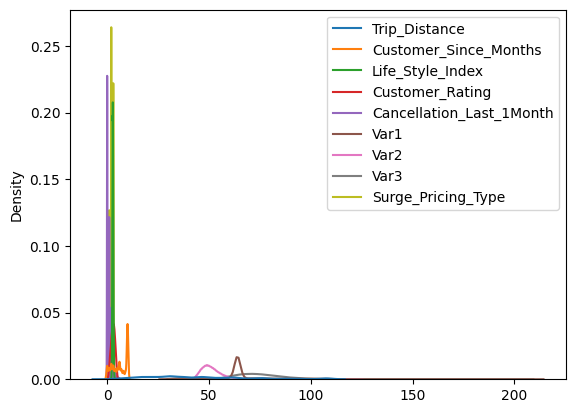

In [ ]:
sns.kdeplot(data=df)

<Axes: xlabel='Customer_Rating', ylabel='Density'>

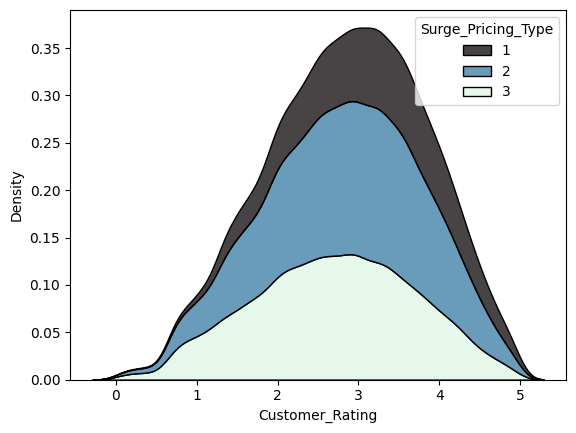

In [ ]:
sns.kdeplot(data=df, x="Customer_Rating", hue="Surge_Pricing_Type", multiple="stack",palette='mako')

For Type 1 Surge pricing the ratings seems to be maintained around 2.5 to 4.

For type 2 Surge pricing type ratings are in range 1 to 4.

For Type 3 Surge pricing type ratings given are very less and in the given, ratings vary from 1 to 4.

We can also generalize that the range of ratings reduced with increase of Types of surge pricing.

<Axes: xlabel='Cancellation_Last_1Month', ylabel='Density'>

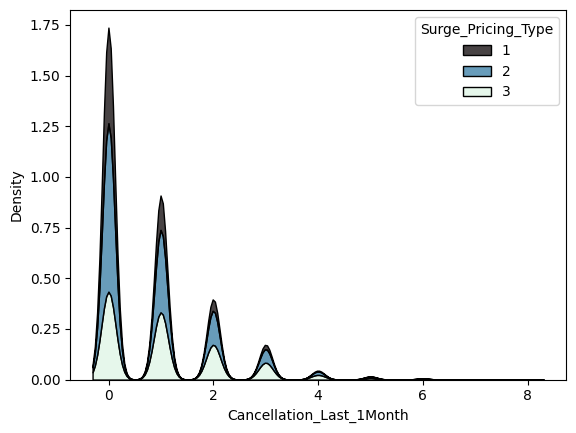

In [ ]:
sns.kdeplot(data=df, x="Cancellation_Last_1Month",hue="Surge_Pricing_Type", multiple="stack",palette='mako')

More cancellations have happened last month and among them they are mostly of Type 1 and Type 2.

We can also observe there are no cancellations happened if there is no surge Type 1.
It can also be said like the cancellations have happened majorly due to surge pricing Type 1 followed by Type 2 and from Type 3 we can say they can be neglected as very few or no cancellations happened.

<Axes: xlabel='Cancellation_Last_1Month', ylabel='Customer_Rating'>

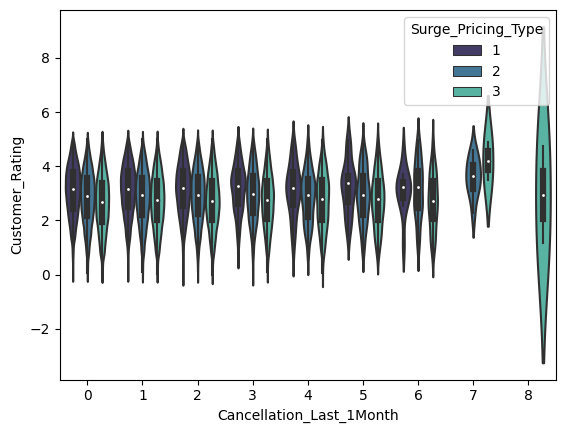

In [ ]:
sns.violinplot(data=df, x="Cancellation_Last_1Month",y='Customer_Rating',hue="Surge_Pricing_Type", multiple="stack",palette='mako')

<Axes: xlabel='Customer_Since_Months', ylabel='Density'>

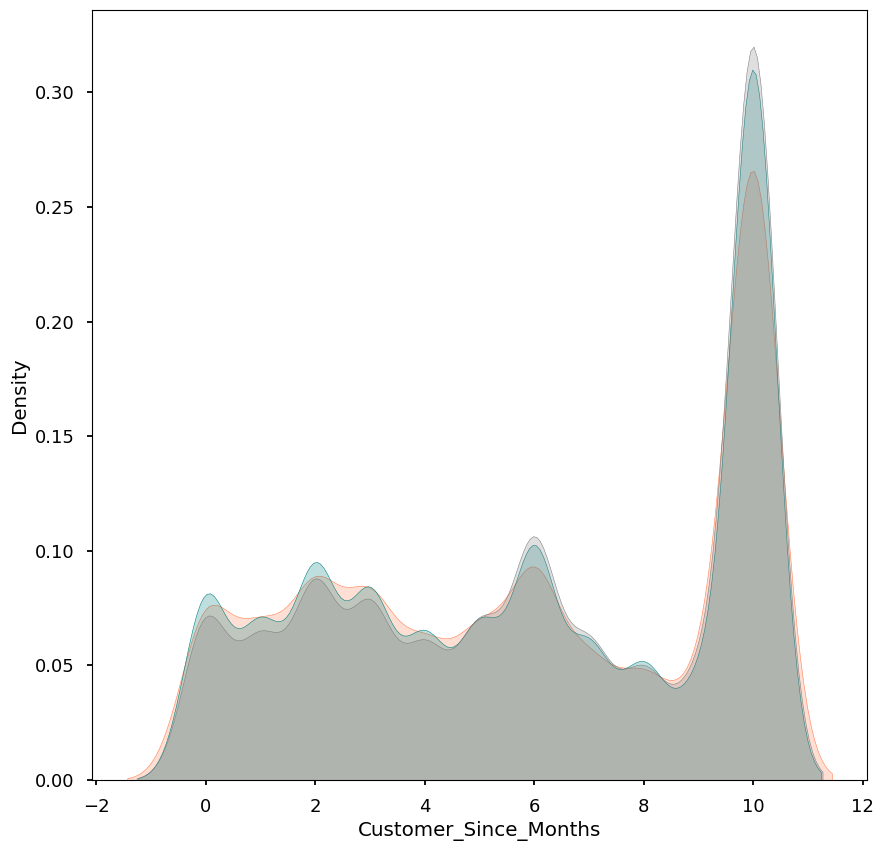

In [ ]:
plt.style.use('seaborn-talk')
import seaborn as sns
fig,a  = plt.subplots(figsize=(10,10))
sns.kdeplot(df['Customer_Since_Months'][df.Surge_Pricing_Type == 1], color="coral", shade=True, ax=a)
sns.kdeplot(df["Customer_Since_Months"][df.Surge_Pricing_Type == 2], color="teal", shade=True, ax=a)
sns.kdeplot(df["Customer_Since_Months"][df.Surge_Pricing_Type == 3], color="grey", shade=True, ax=a)

<Axes: xlabel='Customer_Since_Months', ylabel='count'>

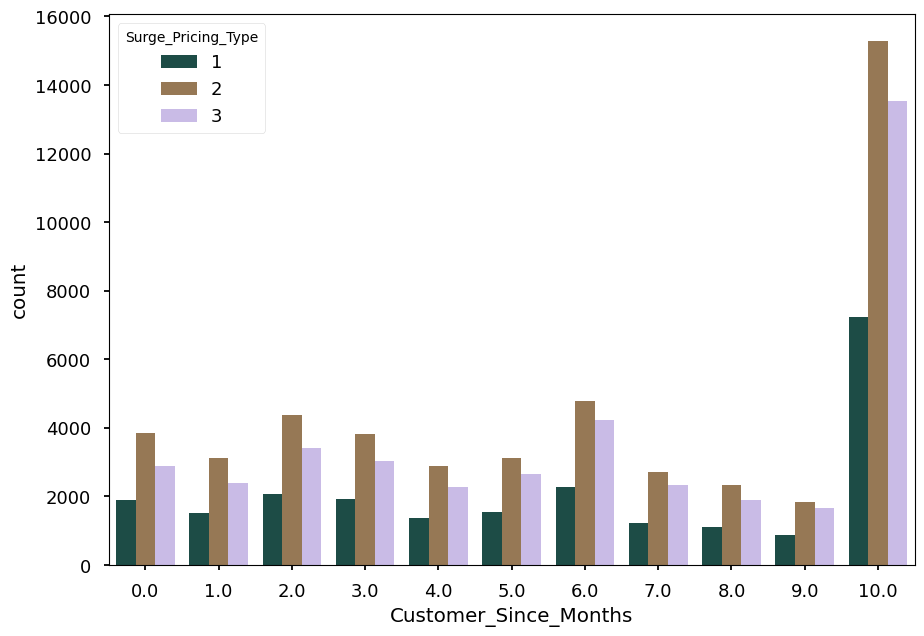

In [ ]:
sns.countplot(data =df, x ='Customer_Since_Months',hue='Surge_Pricing_Type',palette='cubehelix')

<Axes: xlabel='Cancellation_Last_1Month', ylabel='Density'>

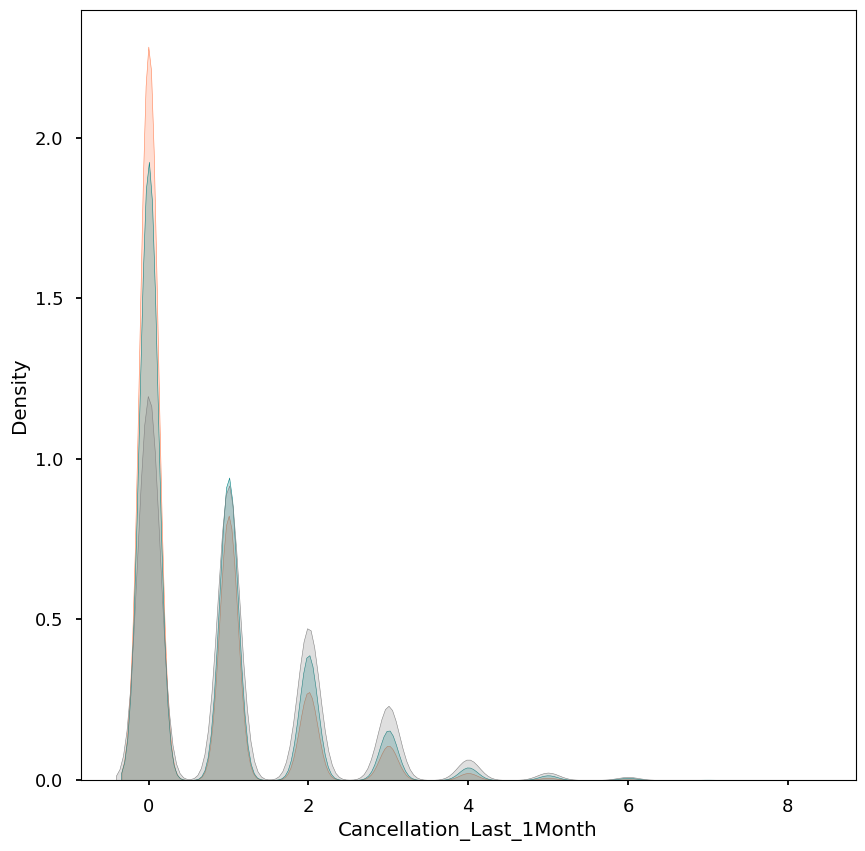

In [ ]:
fig,a  = plt.subplots(figsize=(10,10))
sns.kdeplot(df['Cancellation_Last_1Month'][df.Surge_Pricing_Type == 1], color="coral", shade=True, ax=a)
sns.kdeplot(df["Cancellation_Last_1Month"][df.Surge_Pricing_Type == 2], color="teal", shade=True, ax=a)
sns.kdeplot(df["Cancellation_Last_1Month"][df.Surge_Pricing_Type == 3], color="grey", shade=True, ax=a)

<Axes: xlabel='Type_of_Cab', ylabel='count'>

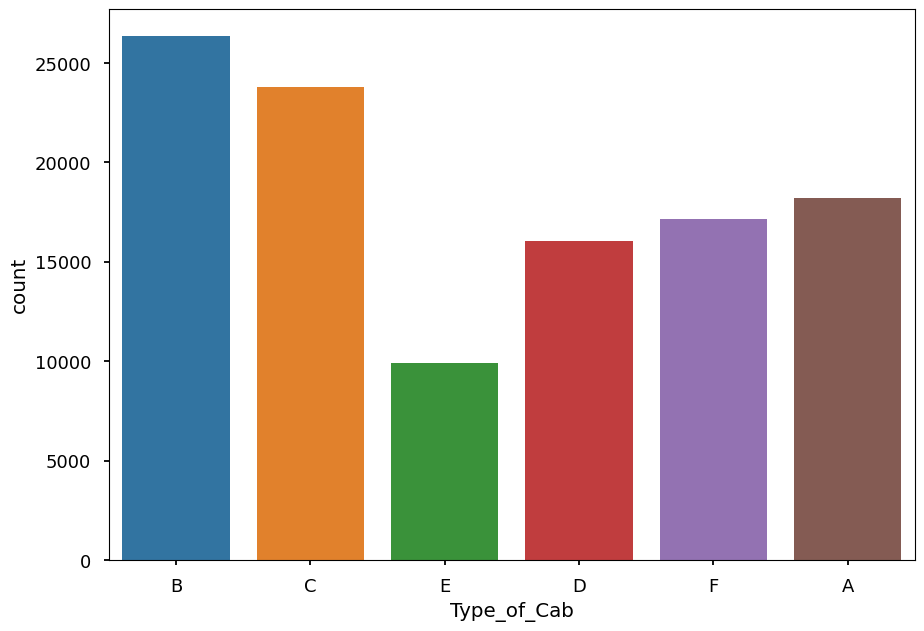

In [ ]:
sns.countplot(x=df["Type_of_Cab"])

<Axes: xlabel='Confidence_Life_Style_Index', ylabel='count'>

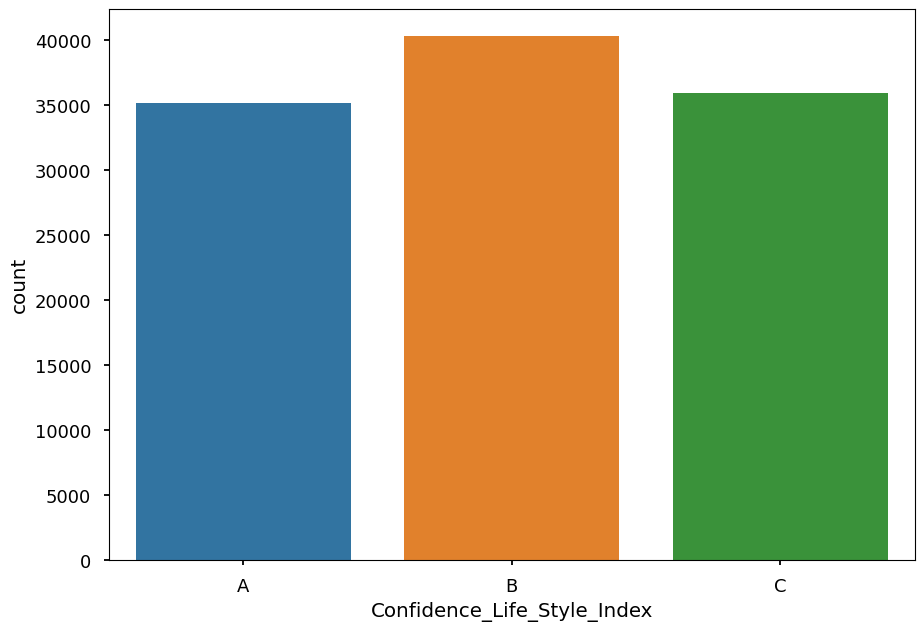

In [ ]:
sns.countplot(x=df["Confidence_Life_Style_Index"])

<Axes: xlabel='Destination_Type', ylabel='count'>

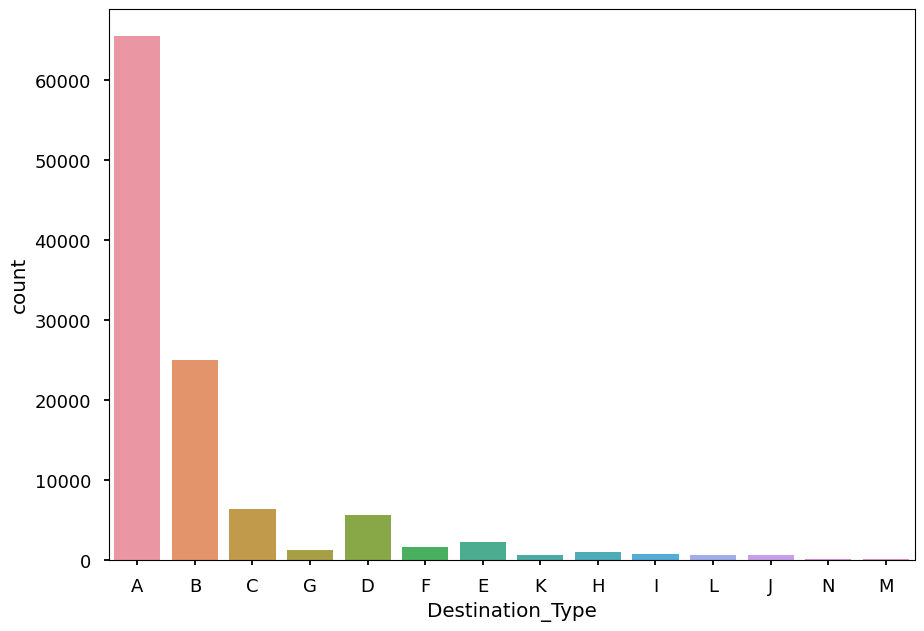

In [ ]:
sns.countplot(x=df["Destination_Type"])

<Axes: xlabel='Gender', ylabel='count'>

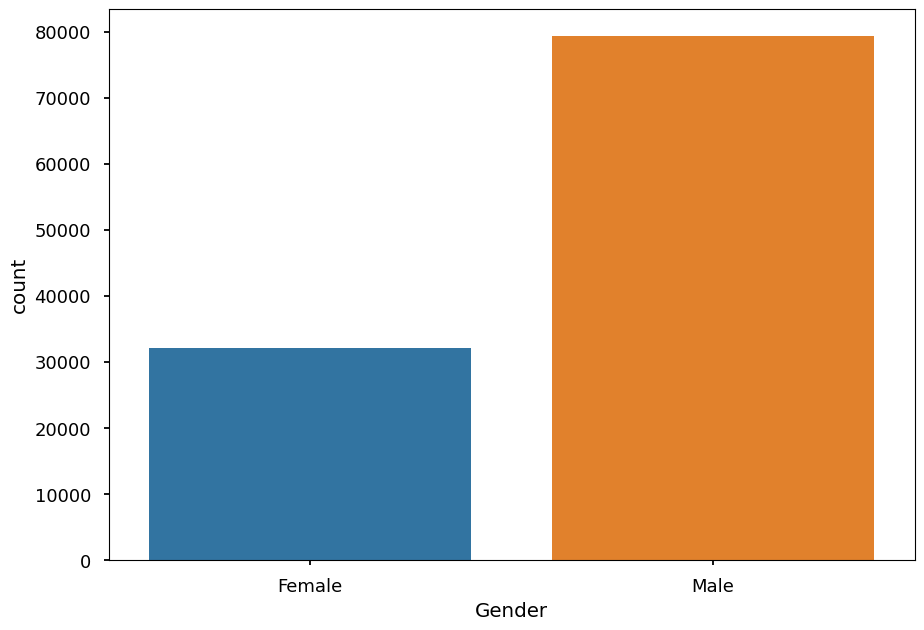

In [ ]:
sns.countplot(x=df["Gender"])

In [ ]:
cats

['Trip_ID',
 'Type_of_Cab',
 'Confidence_Life_Style_Index',
 'Destination_Type',
 'Gender']

In [ ]:
nums

['Trip_Distance',
 'Customer_Since_Months',
 'Life_Style_Index',
 'Customer_Rating',
 'Cancellation_Last_1Month',
 'Var1',
 'Var2',
 'Var3',
 'Surge_Pricing_Type']

<Axes: xlabel='Type_of_Cab', ylabel='Customer_Rating'>

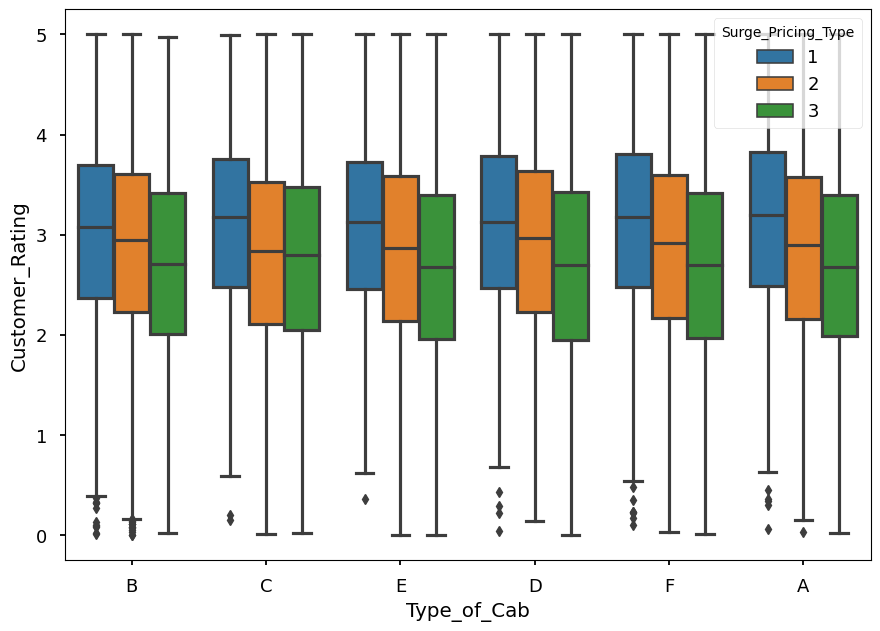

In [ ]:
sns.boxplot(data=df, x="Type_of_Cab", y="Customer_Rating",hue='Surge_Pricing_Type')


<Axes: xlabel='Trip_Distance', ylabel='Confidence_Life_Style_Index'>

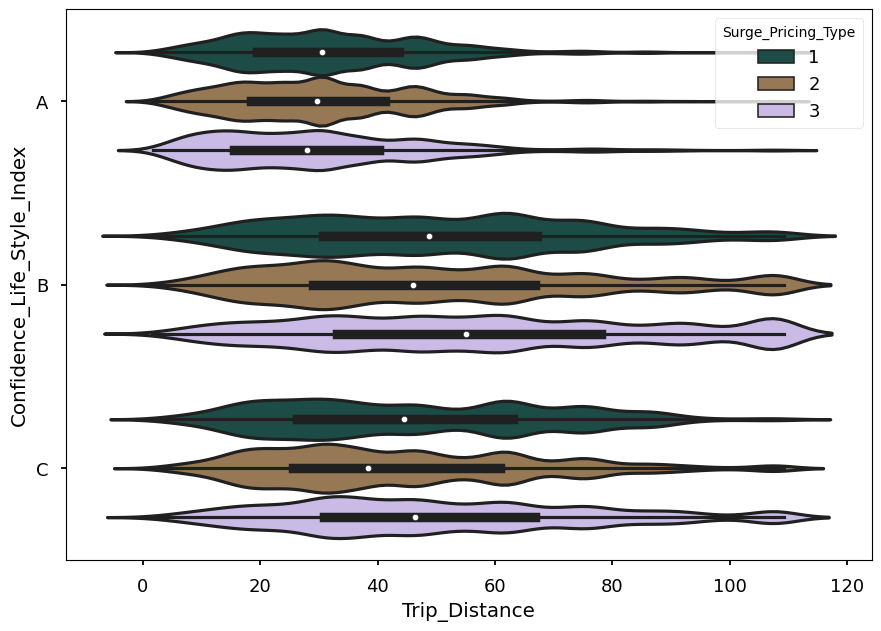

In [ ]:
sns.violinplot(data=df, x="Trip_Distance", y="Confidence_Life_Style_Index", hue="Surge_Pricing_Type",palette='cubehelix')